# ML - KNN Classifier

In [2]:
# Importing all the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [3]:
# Reading csv file
df = pd.read_csv('tested.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Checking dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Choosing Features and Target

In [4]:
# Now selecting the required columns
# We want to take features as Age and Fare and target as 'Survived'
# We will drop all the null rows in 'Age', 'Fare' and 'Survived'

df = df[['Age', 'Fare', 'Survived']].dropna()
df


,Age,Fare,Survived
0,34.5,7.8292,0
1,47.0,7.0000,1
2,62.0,9.6875,0
3,27.0,8.6625,0
4,22.0,12.2875,1
...,...,...,...
409,3.0,13.7750,1
411,37.0,90.0000,1
412,28.0,7.7750,1
414,39.0,108.9000,1


In [5]:
# Checking null in these columns now
df.isnull().sum()


,0
Age,0
Fare,0
Survived,0


In [6]:
# Extracting features and target
x = df[['Age', 'Fare']].values
y = df['Survived'].values

y


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

## Visualization

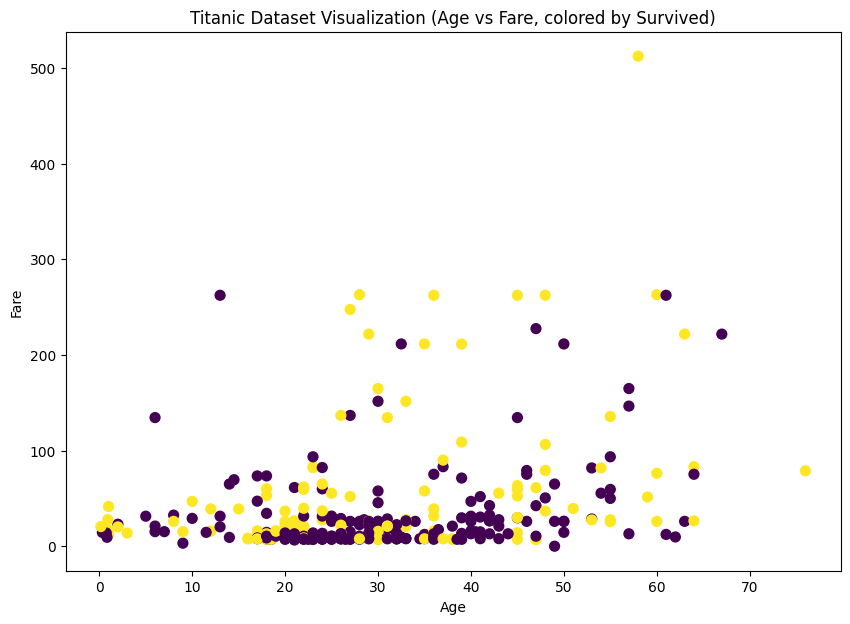

In [7]:
# Making a scatter chart
# Deciding the size of the figure
plt.figure(figsize = (10, 7))

# Making the scatter Plot
plt.scatter(x[: , 0], x[: , 1], c = y, s = 50)

# Deciding the title, xlabel and ylabel
plt.title('Titanic Dataset Visualization (Age vs Fare, colored by Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')

# Showing the plot
plt.show()


## Splitting Dataset( Training and Testing)

In [8]:
# Splitting data into training and testing sets
# 0.2 means , 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


## Training a KNN Classifier

In [9]:
# Training KNN Classifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

## Making Predictions on DataSet

In [10]:
# Making predictiomns
y_pred = knn.predict(X_test)


## Evaluating the Model

In [12]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conMatrix = confusion_matrix(y_test, y_pred)

In [13]:
# Printing the Metrics
print(f"Accuracy: {accuracy: .2f}")
print(f"Precision: {precision: .2f}")
print(f"Recall: {recall: .2f}")


Accuracy:  0.67
Precision:  0.50
Recall:  0.45


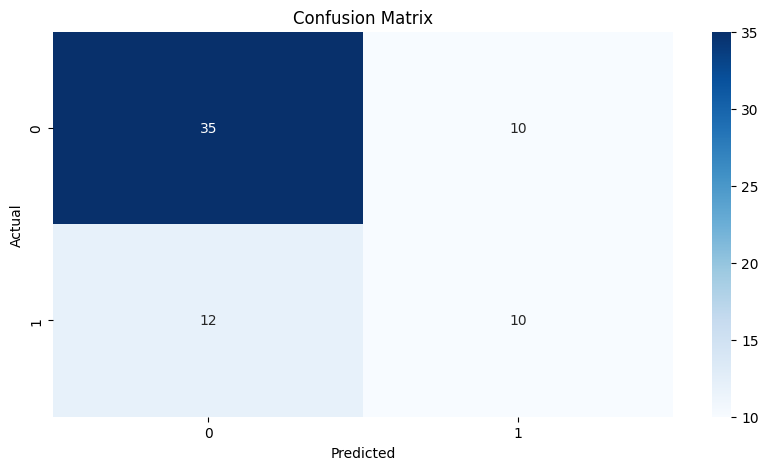

In [14]:
# For confusion matrice we will use visualization with heatmap.
# Deciding the figure size
plt.figure(figsize = (10, 5))

# fmt='d' tells Seaborn to show the numbers in the heatmap as whole numbers (integers).
sns.heatmap(conMatrix, annot = True, cmap = 'Blues', fmt = 'd')

# Putting Title, x and y label
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# showing the plot
plt.show()
